# **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
!{sys.executable} -m pip install xgboost
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# **LOAD THE DATASET**

In [ ]:
df= pd.read_csv(r'C:\Users\admin\Downloads\Rain.csv')
print(df)

       index                SUBDIVISION    YEAR  MONTH  MAX_TEMP  MIN_TEMP  \
0          1  ANDAMAN & NICOBAR ISLANDS  1970.0    1.0     10.61     24.56   
1          2  ANDAMAN & NICOBAR ISLANDS  1970.0    2.0     12.57     26.88   
2          3  ANDAMAN & NICOBAR ISLANDS  1970.0    3.0     16.58     31.12   
3          4  ANDAMAN & NICOBAR ISLANDS  1970.0    4.0     21.47     35.77   
4          5  ANDAMAN & NICOBAR ISLANDS  1970.0    5.0     24.12     37.28   
...      ...                        ...     ...    ...       ...       ...   
13855      7                LAKSHADWEEP  2004.0    7.0     23.86     31.60   
13856      8                LAKSHADWEEP  2004.0    8.0     22.90     30.33   
13857      9                LAKSHADWEEP  2004.0    9.0     22.51     31.65   
13858     10                LAKSHADWEEP  2004.0   10.0     18.85     30.42   
13859     11                LAKSHADWEEP  2004.0   11.0     15.20     28.53   

       MEAN_TEMP  PRECEPTIONS  PRESSURE  WIND_SPEED  RAINFALL  

In [ ]:
df.tail()

,index,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
13855,7,LAKSHADWEEP,2004.0,7.0,23.86,31.60,27.70,230.07,230.07,230.07,280.8
13856,8,LAKSHADWEEP,2004.0,8.0,22.90,30.33,26.59,260.68,260.68,260.68,169.5
13857,9,LAKSHADWEEP,2004.0,9.0,22.51,31.65,27.06,135.92,135.92,135.92,200.0
13858,10,LAKSHADWEEP,2004.0,10.0,18.85,30.42,24.61,108.66,108.66,108.66,193.4
13859,11,LAKSHADWEEP,2004.0,11.0,15.20,28.53,21.84,16.40,16.40,16.40,107.6


# **DATA VISUALIZATION**

# **Univariate Analysis**

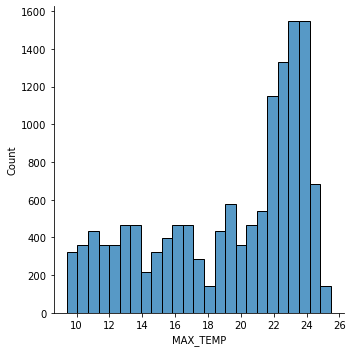

In [ ]:
sns.displot(df["MAX_TEMP"])

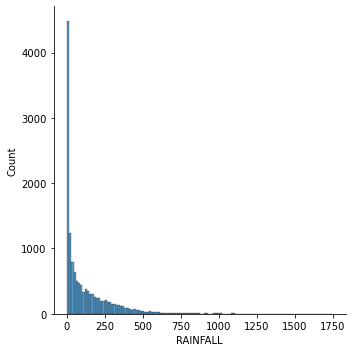

In [ ]:
sns.displot(df["RAINFALL"])

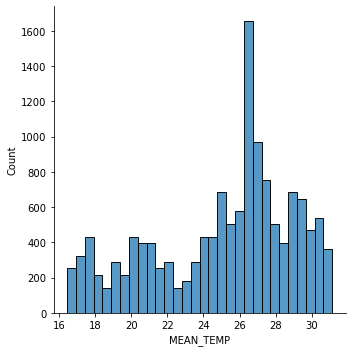

In [ ]:
sns.displot(df["MEAN_TEMP"])

# **Bi-Variate Analysis**

<AxesSubplot:xlabel='MONTH', ylabel='RAINFALL'>

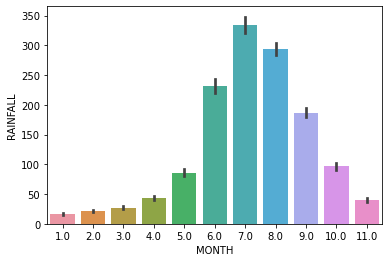

In [ ]:
sns.barplot(x=df.MONTH,y=df.RAINFALL)

<AxesSubplot:xlabel='MONTH', ylabel='WIND_SPEED'>

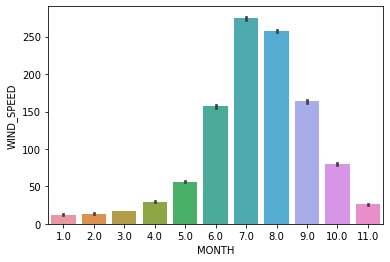

In [ ]:
sns.barplot(x=df.MONTH,y=df.WIND_SPEED)

<AxesSubplot:xlabel='MONTH', ylabel='RAINFALL'>

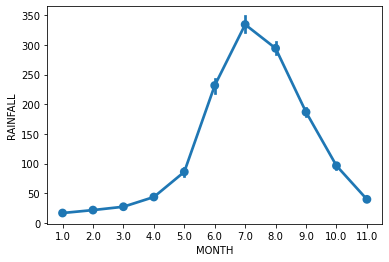

In [ ]:
sns.pointplot(x=df.MONTH,y=df.RAINFALL)

# **Multi-Variate Analysis**

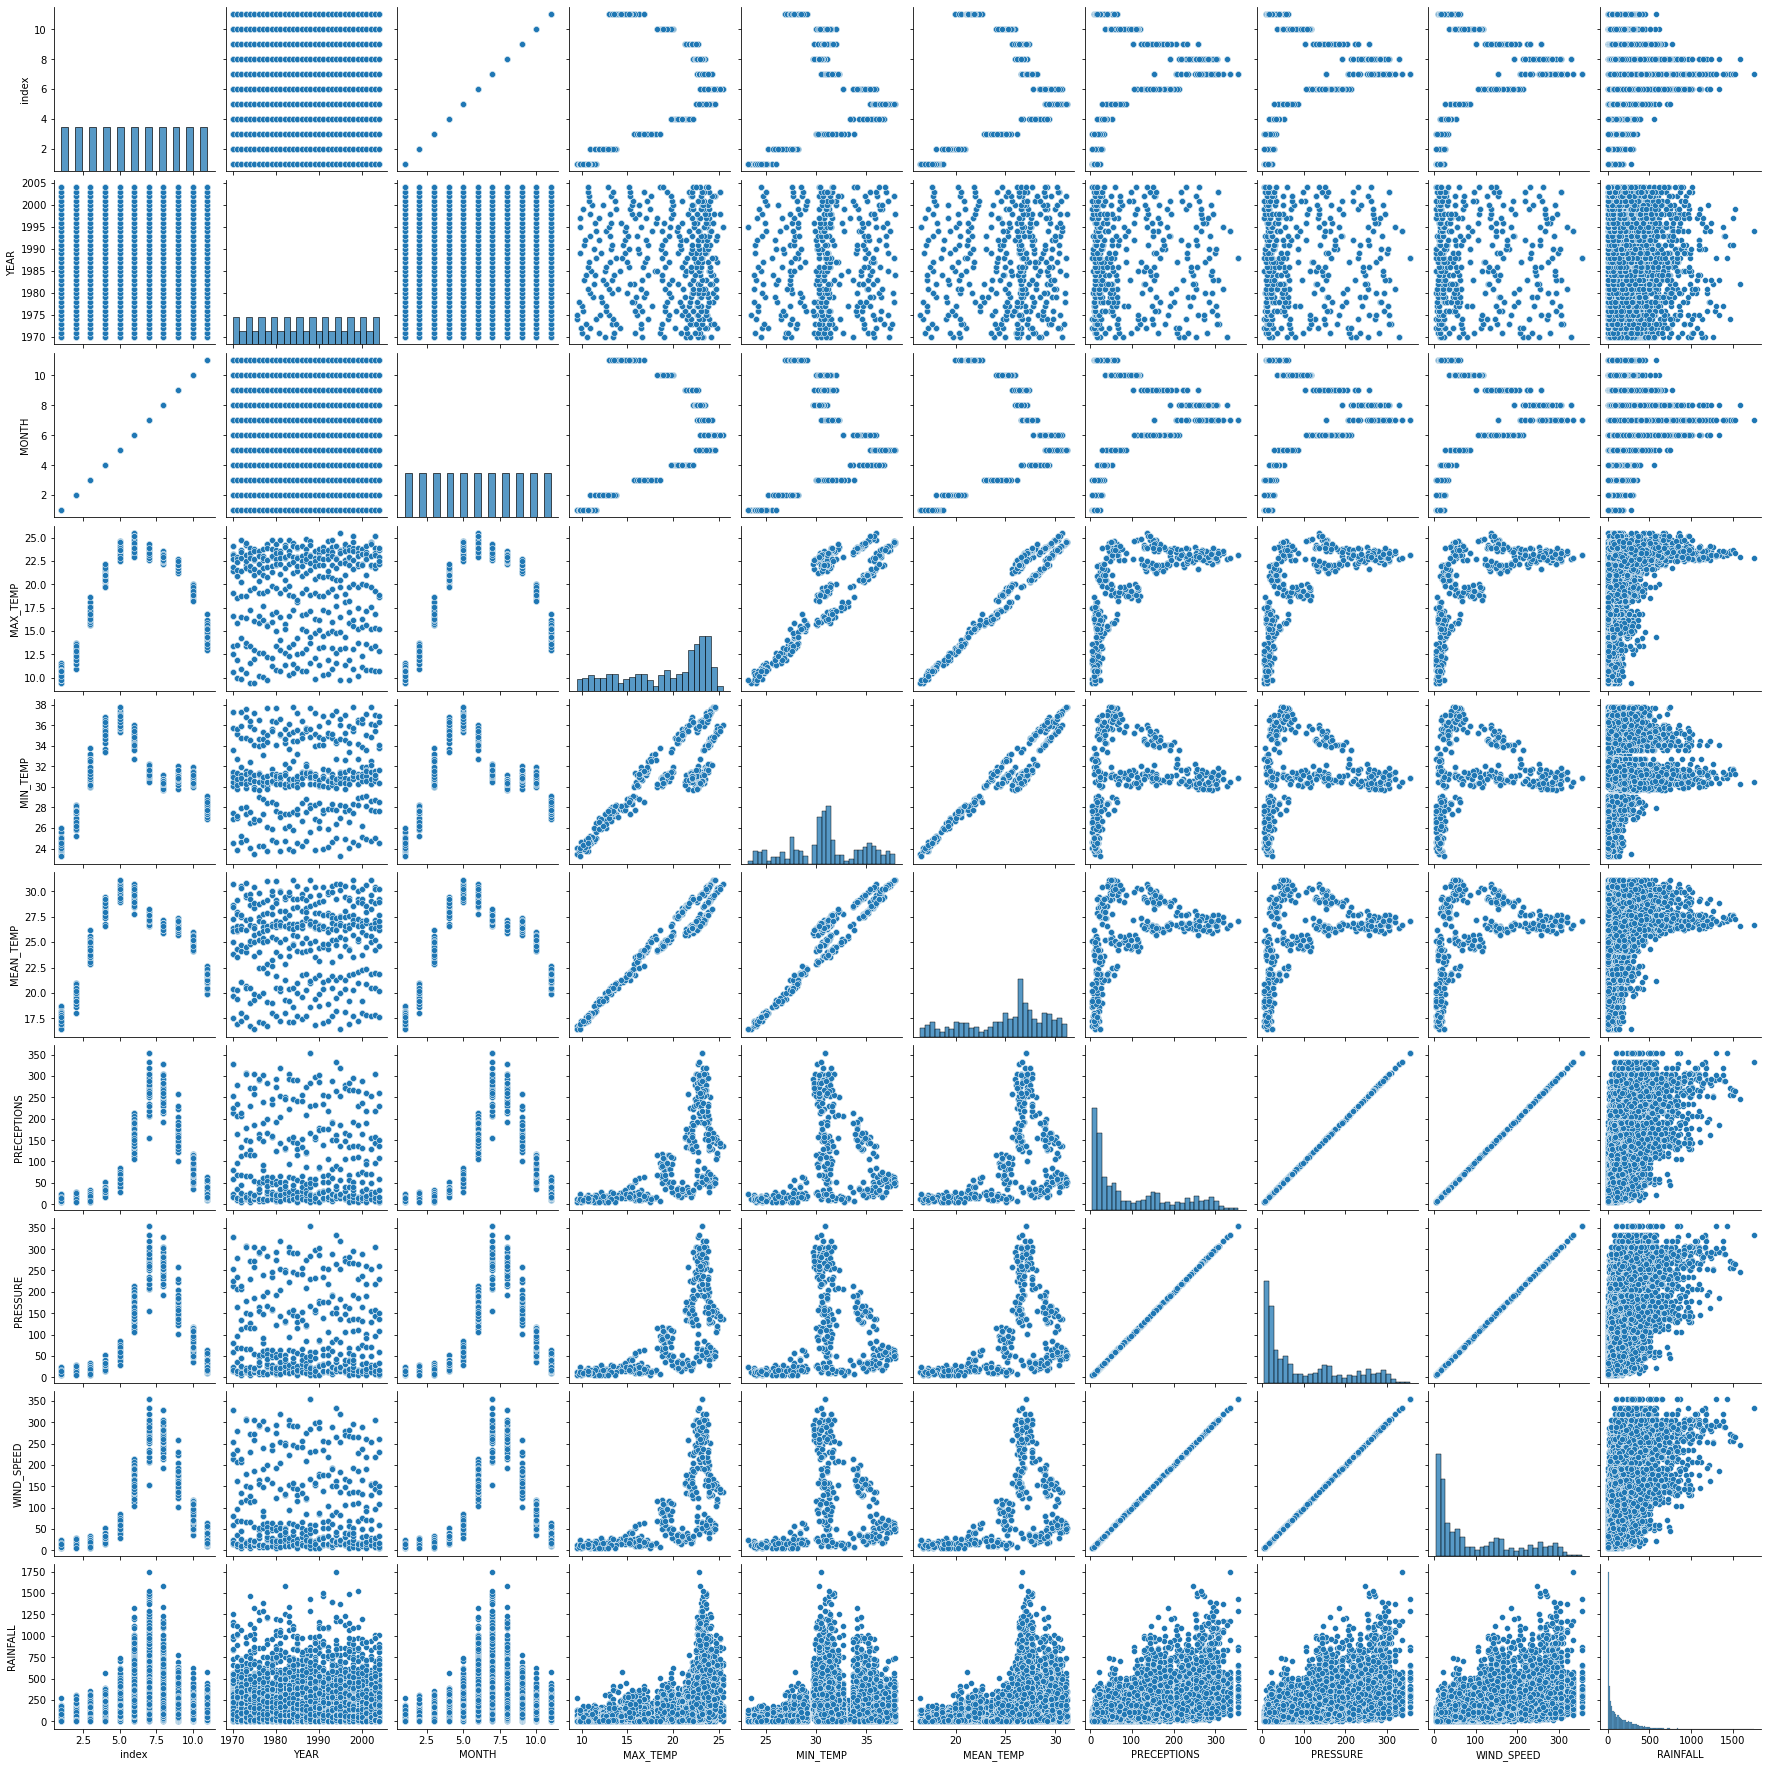

In [ ]:
sns.pairplot(data=df)

# **Perform descriptive statistics on the dataset.**

In [ ]:
df.info()

In [ ]:
df.SUBDIVISION.unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [ ]:
df.describe()

,index,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
count,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000
mean,6.000000,1987.000000,6.000000,19.189870,31.002312,25.072364,98.816442,98.816442,98.816442,125.295873
std,3.162392,10.099869,3.162392,4.605309,3.529054,3.888707,96.541818,96.541818,96.541818,174.800058
min,1.000000,1970.000000,1.000000,9.410000,23.270000,16.440000,4.570000,4.570000,4.570000,0.000000
25%,3.000000,1978.000000,3.000000,15.280000,28.550000,21.910000,18.270000,18.270000,18.270000,7.200000
50%,6.000000,1987.000000,6.000000,21.000000,30.930000,26.280000,52.510000,52.510000,52.510000,52.500000
75%,9.000000,1996.000000,9.000000,23.050000,34.060000,27.840000,162.140000,162.140000,162.140000,183.500000
max,11.000000,2004.000000,11.000000,25.460000,37.810000,31.140000,354.920000,354.920000,354.920000,1748.200000


In [ ]:
df.corr()

,index,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
index,1.000000e+00,-7.249045e-17,1.000000e+00,0.411910,0.134334,0.304756,0.431372,0.431372,0.431372,0.269860
YEAR,-7.249045e-17,1.000000e+00,-8.391942e-17,0.044903,0.042140,0.045657,-0.027385,-0.027385,-0.027385,-0.007877
MONTH,1.000000e+00,-8.391942e-17,1.000000e+00,0.411910,0.134334,0.304756,0.431372,0.431372,0.431372,0.269860
MAX_TEMP,4.119105e-01,4.490339e-02,4.119105e-01,1.000000,0.825994,0.966709,0.666654,0.666654,0.666654,0.459530
MIN_TEMP,1.343338e-01,4.213953e-02,1.343338e-01,0.825994,1.000000,0.942728,0.163844,0.163844,0.163844,0.147121
MEAN_TEMP,3.047564e-01,4.565689e-02,3.047564e-01,0.966709,0.942728,1.000000,0.468879,0.468879,0.468879,0.338717
PRECEPTIONS,4.313722e-01,-2.738502e-02,4.313722e-01,0.666654,0.163844,0.468879,1.000000,1.000000,1.000000,0.642792
PRESSURE,4.313722e-01,-2.738502e-02,4.313722e-01,0.666654,0.163844,0.468879,1.000000,1.000000,1.000000,0.642792
WIND_SPEED,4.313722e-01,-2.738502e-02,4.313722e-01,0.666654,0.163844,0.468879,1.000000,1.000000,1.000000,0.642792
RAINFALL,2.698605e-01,-7.877490e-03,2.698605e-01,0.459530,0.147121,0.338717,0.642792,0.642792,0.642792,1.000000


# **Check for Missing values and deal with them**

In [ ]:
df.isnull().sum()

index          0
SUBDIVISION    0
YEAR           0
MONTH          0
MAX_TEMP       0
MIN_TEMP       0
MEAN_TEMP      0
PRECEPTIONS    0
PRESSURE       0
WIND_SPEED     0
RAINFALL       0
dtype: int64

In [ ]:
s=df.corr()
s

,index,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
index,1.000000e+00,-7.249045e-17,1.000000e+00,0.411910,0.134334,0.304756,0.431372,0.431372,0.431372,0.269860
YEAR,-7.249045e-17,1.000000e+00,-8.391942e-17,0.044903,0.042140,0.045657,-0.027385,-0.027385,-0.027385,-0.007877
MONTH,1.000000e+00,-8.391942e-17,1.000000e+00,0.411910,0.134334,0.304756,0.431372,0.431372,0.431372,0.269860
MAX_TEMP,4.119105e-01,4.490339e-02,4.119105e-01,1.000000,0.825994,0.966709,0.666654,0.666654,0.666654,0.459530
MIN_TEMP,1.343338e-01,4.213953e-02,1.343338e-01,0.825994,1.000000,0.942728,0.163844,0.163844,0.163844,0.147121
MEAN_TEMP,3.047564e-01,4.565689e-02,3.047564e-01,0.966709,0.942728,1.000000,0.468879,0.468879,0.468879,0.338717
PRECEPTIONS,4.313722e-01,-2.738502e-02,4.313722e-01,0.666654,0.163844,0.468879,1.000000,1.000000,1.000000,0.642792
PRESSURE,4.313722e-01,-2.738502e-02,4.313722e-01,0.666654,0.163844,0.468879,1.000000,1.000000,1.000000,0.642792
WIND_SPEED,4.313722e-01,-2.738502e-02,4.313722e-01,0.666654,0.163844,0.468879,1.000000,1.000000,1.000000,0.642792
RAINFALL,2.698605e-01,-7.877490e-03,2.698605e-01,0.459530,0.147121,0.338717,0.642792,0.642792,0.642792,1.000000


<AxesSubplot:>

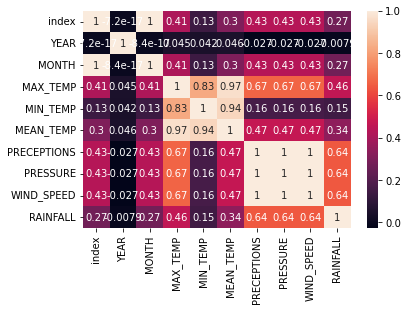

In [ ]:
sns.heatmap(s,annot=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        13860 non-null  int64  
 1   SUBDIVISION  13860 non-null  object 
 2   YEAR         13860 non-null  float64
 3   MONTH        13860 non-null  float64
 4   MAX_TEMP     13860 non-null  float64
 5   MIN_TEMP     13860 non-null  float64
 6   MEAN_TEMP    13860 non-null  float64
 7   PRECEPTIONS  13860 non-null  float64
 8   PRESSURE     13860 non-null  float64
 9   WIND_SPEED   13860 non-null  float64
 10  RAINFALL     13860 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
df.head()

,index,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
0,1,ANDAMAN & NICOBAR ISLANDS,1970.0,1.0,10.61,24.56,17.56,18.06,18.06,18.06,72.2
1,2,ANDAMAN & NICOBAR ISLANDS,1970.0,2.0,12.57,26.88,19.71,15.79,15.79,15.79,34.0
2,3,ANDAMAN & NICOBAR ISLANDS,1970.0,3.0,16.58,31.12,23.82,21.89,21.89,21.89,7.8
3,4,ANDAMAN & NICOBAR ISLANDS,1970.0,4.0,21.47,35.77,28.60,24.42,24.42,24.42,58.2
4,5,ANDAMAN & NICOBAR ISLANDS,1970.0,5.0,24.12,37.28,30.67,60.09,60.09,60.09,422.7


In [ ]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
df.SUBDIVISION = lab.fit_transform(df.SUBDIVISION)

df.head()

,index,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
0,1,0,1970.0,1.0,10.61,24.56,17.56,18.06,18.06,18.06,72.2
1,2,0,1970.0,2.0,12.57,26.88,19.71,15.79,15.79,15.79,34.0
2,3,0,1970.0,3.0,16.58,31.12,23.82,21.89,21.89,21.89,7.8
3,4,0,1970.0,4.0,21.47,35.77,28.60,24.42,24.42,24.42,58.2
4,5,0,1970.0,5.0,24.12,37.28,30.67,60.09,60.09,60.09,422.7


In [ ]:
df.SUBDIVISION.unique()

array([ 0,  1,  2, 21, 28, 10, 23, 15,  3,  9, 35, 31, 12, 24, 13, 14, 34,
        8, 33,  7, 11, 26, 17, 19, 20, 32,  4,  5, 30, 25, 29,  6, 22, 27,
       16, 18])

# **Split the data into dependent and independent variables**

In [ ]:
feature=df[["SUBDIVISION","MONTH","MAX_TEMP","MIN_TEMP","MEAN_TEMP","PRECEPTIONS","PRESSURE","WIND_SPEED"]]
target=df["RAINFALL"]

In [ ]:
acc=[]
model=[]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=2)

In [ ]:
X_train

,SUBDIVISION,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED
3944,35,7.0,22.66,30.49,26.55,283.52,283.52,283.52
2132,10,10.0,18.83,30.94,24.86,49.68,49.68,49.68
10833,30,10.0,19.39,30.81,25.07,114.18,114.18,114.18
13500,18,4.0,20.21,34.75,27.46,23.45,23.45,23.45
8061,11,10.0,19.76,31.43,25.57,71.70,71.70,71.70
...,...,...,...,...,...,...,...,...
2514,23,7.0,23.19,30.91,27.03,354.92,354.92,354.92
11798,29,7.0,23.73,31.60,27.64,218.17,218.17,218.17
6637,8,5.0,24.38,37.69,31.01,63.51,63.51,63.51
2575,23,2.0,12.61,26.39,19.48,16.09,16.09,16.09


In [ ]:
y_train

3944     279.7
2132     100.4
10833    261.6
13500     11.4
8061       0.6
         ...  
2514     286.1
11798     77.9
6637       0.0
2575      28.6
7336       0.0
Name: RAINFALL, Length: 11088, dtype: float64

In [ ]:
X_test

,SUBDIVISION,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED
1259,21,6.0,24.75,35.40,30.05,156.79,156.79,156.79
9730,32,7.0,23.79,31.69,27.72,234.91,234.91,234.91
10599,5,7.0,23.19,30.91,27.03,354.92,354.92,354.92
12635,22,8.0,23.53,30.78,27.13,266.45,266.45,266.45
9771,32,4.0,19.87,33.65,26.74,28.01,28.01,28.01
...,...,...,...,...,...,...,...,...
9587,20,7.0,23.17,31.04,27.08,259.89,259.89,259.89
2715,15,10.0,18.57,30.16,24.34,97.10,97.10,97.10
1736,28,10.0,19.53,31.38,25.43,85.95,85.95,85.95
6368,34,11.0,14.40,27.92,21.14,20.87,20.87,20.87


In [ ]:
y_test

1259     361.8
9730     218.2
10599    313.4
12635    155.4
9771       1.5
         ...  
9587      56.7
2715     104.0
1736     150.3
6368       0.0
9667     163.4
Name: RAINFALL, Length: 2772, dtype: float64

# **BUILD THE MODEL**

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,classification_report,mean_squared_error,r2_score

In [ ]:
# create a regressor object
dtregressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
dtregressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# predicting with regression model with X and Y
y_train_pred=dtregressor.predict(X_train)
y_test_pred=dtregressor.predict(X_test)

In [ ]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 0.0 8104.596921591064
(1.0, 0.7539478425880428)


In [ ]:
#Accuracy Score
model.append('Decision Tree')
acc.append(dtregressor.score(X_test,y_test))
print(dtregressor.score(X_test,y_test))

0.7357778985656918


# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression  

In [ ]:
# create a regressor object
lregressor= LinearRegression()  

# fit the regressor with X and Y data
lregressor.fit(X_train, y_train) 

LinearRegression()

In [ ]:
# predicting with regression model with X and Y
y_train_pred=lregressor.predict(X_train)
y_test_pred=lregressor.predict(X_test)

In [ ]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 17087.655003082753 16768.378500362385
(0.4401649700134145, -0.23486479510569613)


In [ ]:
#Accuracy Score
model.append('Linear Regression')
acc.append(lregressor.score(X_test,y_test))
print(lregressor.score(X_test,y_test))

0.4533255326729033


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# create a regressor object
forest=RandomForestRegressor()

# fit the regressor with X and Y data
forest.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# predicting with regression model with X and Y
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

In [ ]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 653.5931746045646 4605.910899455928
(0.9785866255821667, 0.8377911314344242)


In [ ]:
#Accuracy Score
model.append('Random Forest')
acc.append(forest.score(X_test,y_test))
print(forest.score(X_test,y_test))

0.8498403475648094


# **XGBOOST**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# create a regressor object
xgb = XGBRegressor()

# fit the regressor with X and Y data
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
# predicting with regression model with X and Y
y_train_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(X_test)

In [ ]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 1783.612171383664 4360.081463722859
(0.9415643297298038, 0.8419494303065206)


In [ ]:
#Accuracy Score
model.append('XGB Boost')
acc.append(xgb.score(X_test,y_test))
print(xgb.score(X_test,y_test))

0.8578547584889064


# **Evaluating Accuracy**

In [ ]:
data={'Algorithms':model,'Accuracy':acc}
AC=pd.DataFrame(data)
AC

,Algorithms,Accuracy
0,Decision Tree,0.735778
1,Linear Regression,0.453326
2,Random Forest,0.849840
3,XGB Boost,0.857855


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithms'>

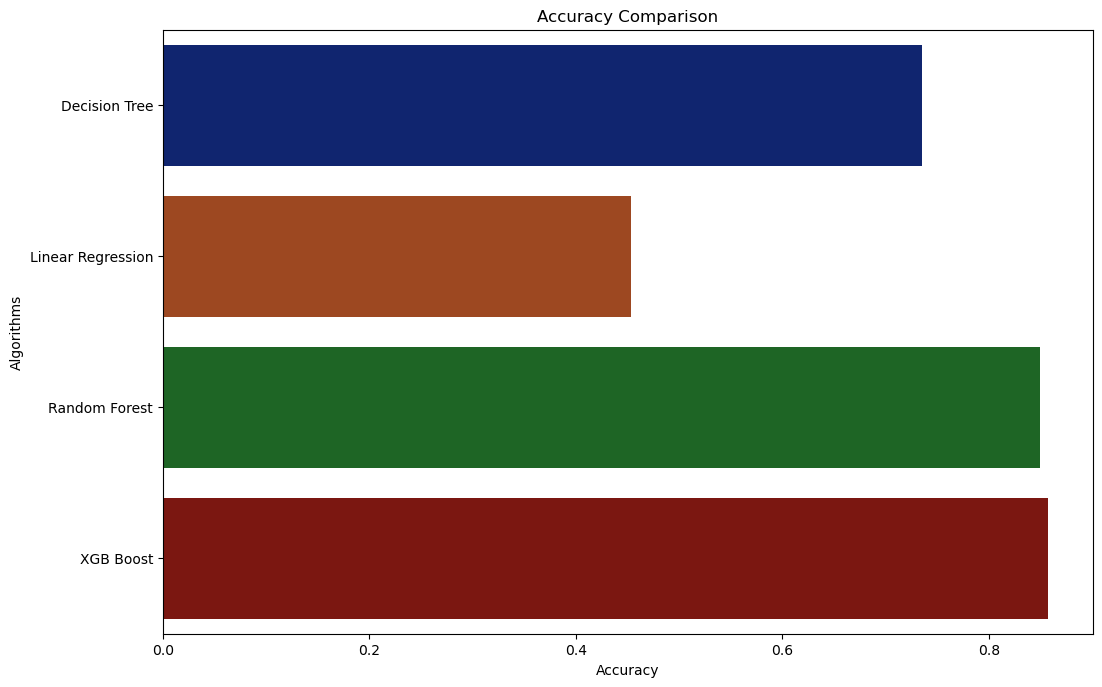

In [ ]:
plt.figure(figsize=[12,8],dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x=acc,y=model,palette='dark')

# **Save the Best Model**

In [ ]:
import pickle
file_name=('rainfall.pkl')
pkl=open(file_name,'wb')
pickle.dump(xgb,pkl)
pkl.close()

In [ ]:
loaded_model=pickle.load(open(file_name,'rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.8578547584889064


In [ ]:
import pickle
with open('xg_pickle','wb') as s:
    pickle.dump(xgb,s)

In [ ]:
import pickle
with open('xg_pickle','rb') as s:
model=pickle.load(s)